<a href="https://colab.research.google.com/github/C-HARRIETH/WK9-IP/blob/main/Moringa_DS_Core_W8_Independent_Project_I_2021_04_Python_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC ANALYSIS**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict whether a passenger in the titanic would have survived or not based on the features given.

### b) Defining the Metric for Success

### c) Understanding the context 

The Titanic, a british luxury liner, sank in 1912, during its maiden voyage killing about 1,500 people when it hit an iceberg. It is one of the most famous shipwrecks and has been incorporated in the media industry in form of plays and movies. Questions still linger, what were the factors that determined whether a passenger survived or died in the shipwreck, did some people have higher chances of surviving than others. All this is investigated through the application of data science.

### d) Recording the Experimental Design

The experimental design taken is Independent measures done by random allocation.

### e) Data Relevance

Data provided was highly relevant to the research

## 2. Reading the Data

In [1]:
# Import relevant libraries and dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data
# ---
missing_values= ['nan']
train= pd.read_csv('train (5).csv', na_values=missing_values)
test= pd.read_csv('test (1).csv', na_values=missing_values)



## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#

train.shape, test.shape

((891, 12), (418, 11))

In [4]:
# Previewing the top of the train dataset
#

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Previewing the test dataset
# 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Checking the columns in both train and test datasets

train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [7]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

## 4. External Data Source Validation

The Titanic dataset is one of the most popular datasets and is described [here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html).

## 5. Tidying the Dataset

In [11]:
# Identifying Missing Data
#

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

77% of the cabin data is missing hence the decision to drop the column.

In [15]:
# # Getting the average ages according to Pclass

train['Age'].groupby(train['Pclass']).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Dealing with the Missing Data
#

train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [20]:
train.dropna(inplace=True)
train.isnull().values.any()

False

In [21]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

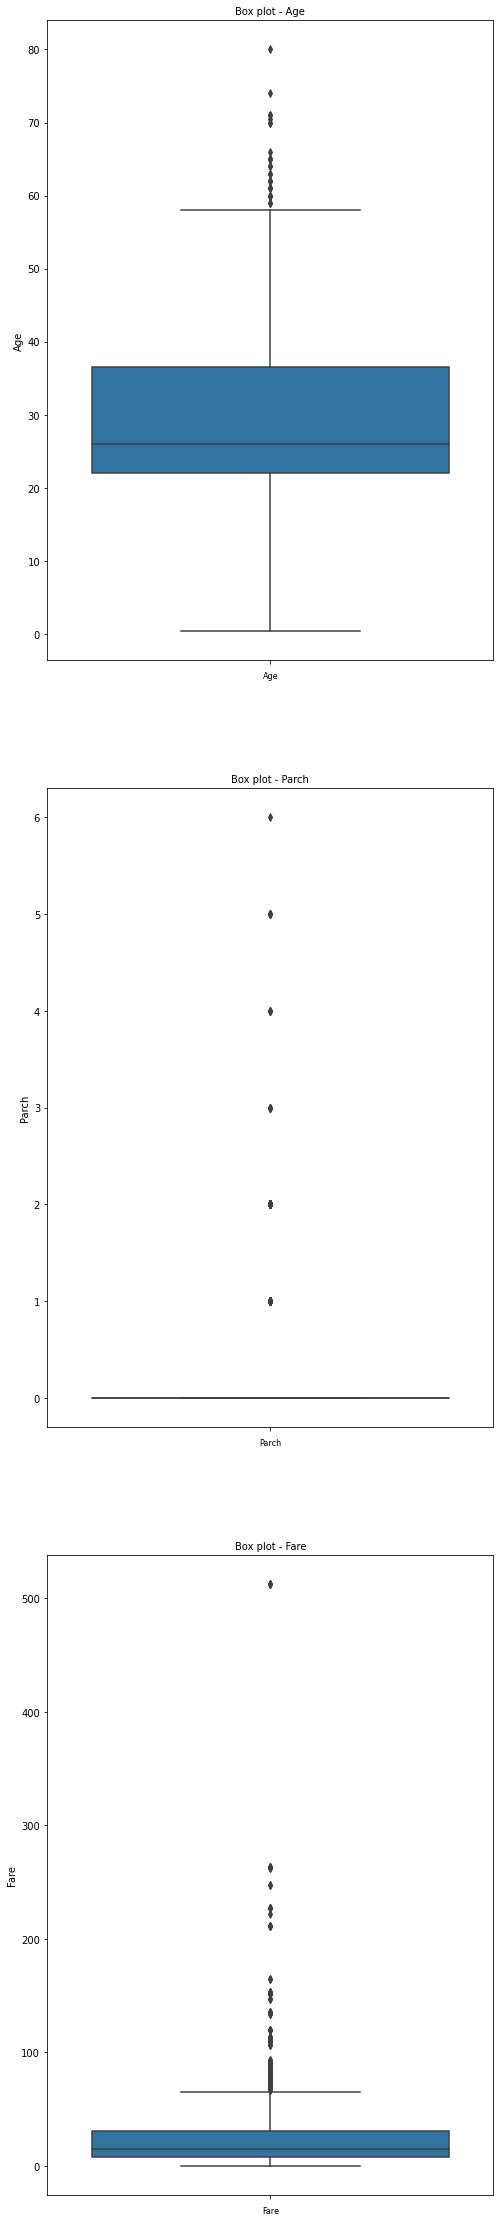

In [22]:
# Checking for Outliers
#


col_names = ['Age', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=train[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
titanic = pd.concat([train, sex, embark],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [27]:
# Drop other columns

titanic.drop(['Embarked', 'Sex'], axis=1, inplace=True)

## 6. Exploratory Analysis

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


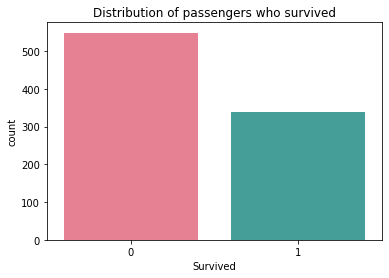

In [29]:
# Distribution

sns.countplot(x='Survived',data=titanic, palette='husl')
plt.title('Distribution of passengers who survived')
plt.show()

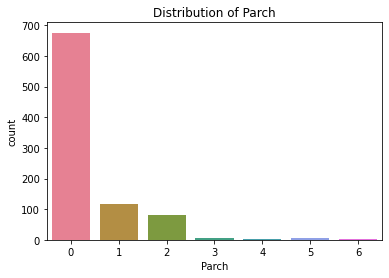

In [30]:
# Distribution

sns.countplot(x='Parch',data=titanic, palette='husl')
plt.title('Distribution of Parch')
plt.show()

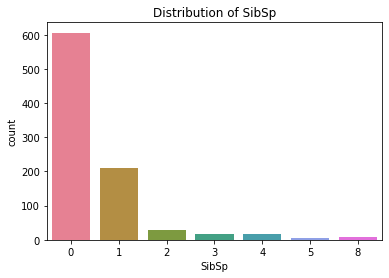

In [31]:
# Distribution

sns.countplot(x='SibSp',data=titanic, palette='husl')
plt.title('Distribution of SibSp')
plt.show()

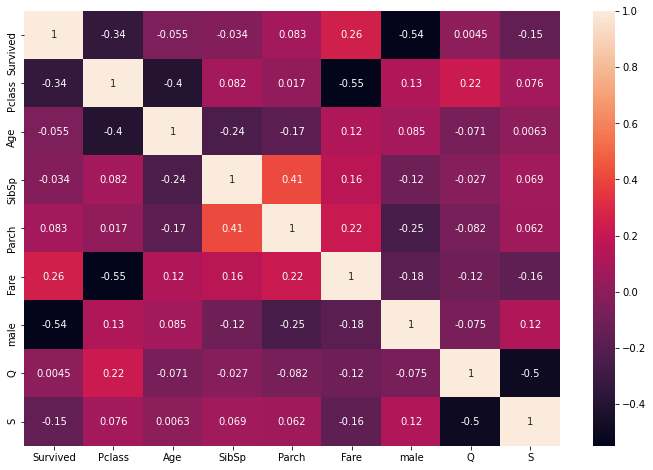

In [32]:
# Heat map showing correlation

plt.figure(figsize=(12, 8))

dfcorr = titanic.corr()
sns.heatmap(dfcorr, 
            xticklabels = dfcorr.columns.values,
            yticklabels = dfcorr.columns.values,
            annot = True);

In [33]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


A female had more chances of surving than a male did.

In [34]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


A passenger in 1st class had 38% more chances of survival than one in 3rd class.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


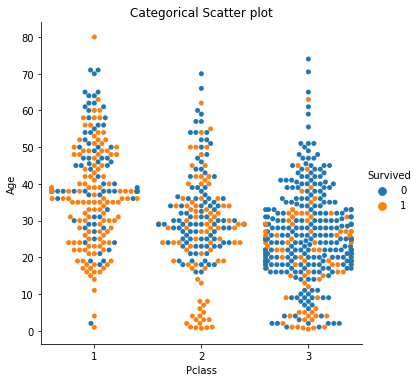

In [35]:
sns.catplot(x="Pclass", y="Age", hue="Survived", kind="swarm", data=train)
plt.title('Categorical Scatter plot')
plt.show()

Most of the passengers in 3rd class were between age 15 and 35.

From the plot, most of the people in 1st class survived as compared to 3rd class.

## 7. Implementing the Solution

In [36]:
# Splitting the dataset
#
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=25)

In [37]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Fitting the model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
# Prediction

y_pred = classifier.predict(X_test)

In [40]:
# Assessing performance of the model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[190  22]
 [ 49  95]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       212
           1       0.81      0.66      0.73       144

    accuracy                           0.80       356
   macro avg       0.80      0.78      0.79       356
weighted avg       0.80      0.80      0.80       356



Accuracy Analysis according to train and test splits.

| Split(%) | Accuracy|
|:---------|--------:|
|80-20  | 76% |
| 70-30 | 79% |
| 60-40 | 80% |


### Optimization of model

In [41]:
# Getting a good k value by cross validation

from sklearn.model_selection import cross_val_score

k_range = range(1, 41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean())

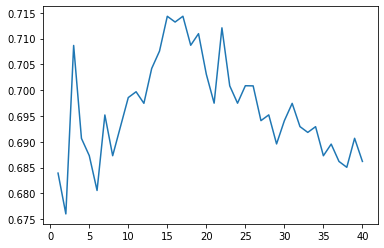

In [42]:
# Visualizing output

sns.lineplot(x = k_range, y = k_scores);

The best k value is between 15 and 17

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [44]:
# Fitting the model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

# Assessing performance of the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[183  29]
 [ 45  99]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       212
           1       0.77      0.69      0.73       144

    accuracy                           0.79       356
   macro avg       0.79      0.78      0.78       356
weighted avg       0.79      0.79      0.79       356



When LDA is applied, with 1, 2 or 3 components, the accuracy score is 79%. When the value of n_neighbours is increased to 15, the accuracy improves by one percent coming to 80%. When k is increased to 17, accuracy falls back to 79%

## 8. Follow up questions

### a). Did we have the right data?

The data used was sufficient.

### b). Do we need other data to answer our question?

Data regarding the cabin was missing, if it were there, more insights from the data would have been gotten at.